In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',200)

In [3]:
import missingno as msno

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv('../data/used_cars/train-data.csv')

In [6]:
data_test=pd.read_csv('../data/used_cars/test-data.csv')

In [7]:
data_test.head(1)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN


<AxesSubplot:>

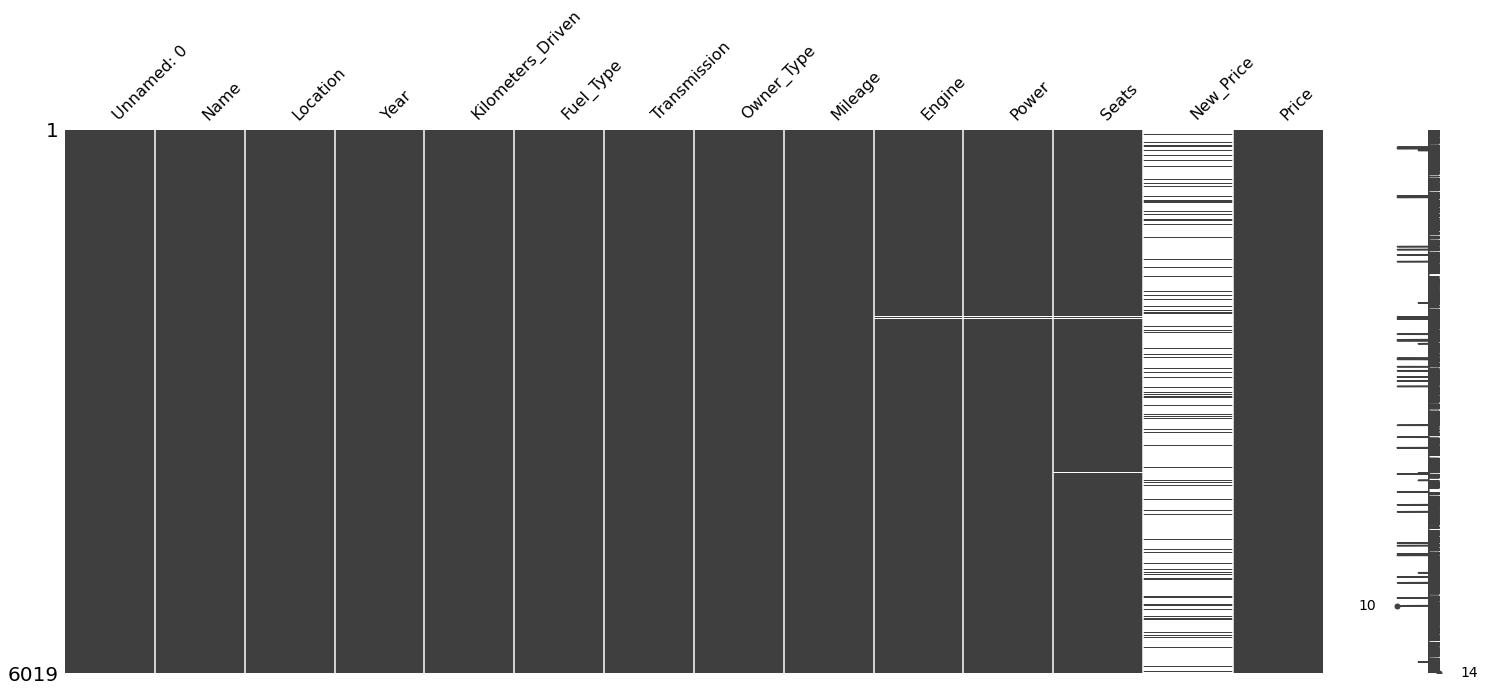

In [8]:
msno.matrix(data)

In [9]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
data.isnull().sum()/data.shape[0]

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

In [11]:
data=data.drop(columns=['Unnamed: 0','New_Price'])

In [12]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [13]:
data.isnull().sum()/data.shape[0]

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
Price                0.000000
dtype: float64

In [14]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [15]:
data['Location'].value_counts(1)

Mumbai        0.131251
Hyderabad     0.123276
Kochi         0.108158
Coimbatore    0.105665
Pune          0.103339
Delhi         0.092042
Kolkata       0.088885
Chennai       0.082073
Jaipur        0.068616
Bangalore     0.059478
Ahmedabad     0.037215
Name: Location, dtype: float64

In [16]:
data['Fuel_Type'].value_counts(1)

Diesel      0.532480
Petrol      0.456222
CNG         0.009304
LPG         0.001661
Electric    0.000332
Name: Fuel_Type, dtype: float64

In [17]:
data['Fuel_Type']=data['Fuel_Type'].replace(['CNG','LPG','Electric'],'Alternative')

In [18]:
data['Transmission'].value_counts(1)

Manual       0.714238
Automatic    0.285762
Name: Transmission, dtype: float64

In [58]:
data['Transmission']=(data['Transmission']=='Manual')*1

In [60]:
data['Transmission']

0       1
1       1
2       1
3       1
4       0
       ..
6014    1
6015    1
6016    1
6017    1
6018    1
Name: Transmission, Length: 6019, dtype: int64

In [19]:
data['Owner_Type'].value_counts(1)

First             0.818907
Second            0.160824
Third             0.018774
Fourth & Above    0.001495
Name: Owner_Type, dtype: float64

In [20]:
data['Owner_Type']=data['Owner_Type'].replace(['First','Second','Third','Fourth & Above'],[1,2,3,4])

In [21]:
data['Mileage'].value_counts(1)

17.0 kmpl     0.028586
18.9 kmpl     0.028586
18.6 kmpl     0.019777
20.36 kmpl    0.014625
21.1 kmpl     0.014293
                ...   
15.42 kmpl    0.000166
12.95 kmpl    0.000166
13.29 kmpl    0.000166
14.81 kmpl    0.000166
14.47 kmpl    0.000166
Name: Mileage, Length: 442, dtype: float64

In [22]:
data['Mileage'].str.split(' ',expand=True)

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl
...,...,...
6014,28.4,kmpl
6015,24.4,kmpl
6016,14.0,kmpl
6017,18.9,kmpl


In [23]:
data[['Mileage','unidad']]=data['Mileage'].str.split(' ',expand=True)

In [27]:
data[['Mileage','unidad']].apply(lambda x: float(x['Mileage'])*1.4 if x['unidad']=='km/kg' else  float(x['Mileage']),axis=1)

0       37.24
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Length: 6019, dtype: float64

In [26]:
data['Mileage_norm']=data[['Mileage','unidad']].apply(lambda x: float(x['Mileage'])*1.4 if x['unidad']=='km/kg' else  float(x['Mileage']),axis=1)

In [28]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,unidad,Mileage_norm
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Alternative,Manual,1,26.6,998 CC,58.16 bhp,5.0,1.75,km/kg,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582 CC,126.2 bhp,5.0,12.50,kmpl,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2,1199 CC,88.7 bhp,5.0,4.50,kmpl,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248 CC,88.76 bhp,7.0,6.00,kmpl,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2,1968 CC,140.8 bhp,5.0,17.74,kmpl,15.20


In [33]:
data['Engine'].str.split()

0        [998, CC]
1       [1582, CC]
2       [1199, CC]
3       [1248, CC]
4       [1968, CC]
           ...    
6014    [1248, CC]
6015    [1120, CC]
6016    [2498, CC]
6017     [998, CC]
6018     [936, CC]
Name: Engine, Length: 6019, dtype: object

In [ ]:
data['Engine'].str.split().str[0]

In [35]:
data['Engine']=data['Engine'].str.split().str[0].astype(float)

In [36]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,unidad,Mileage_norm
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Alternative,Manual,1,26.6,998.0,58.16 bhp,5.0,1.75,km/kg,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.2 bhp,5.0,12.50,kmpl,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2,1199.0,88.7 bhp,5.0,4.50,kmpl,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76 bhp,7.0,6.00,kmpl,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2,1968.0,140.8 bhp,5.0,17.74,kmpl,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1,28.4,1248.0,74 bhp,5.0,4.75,kmpl,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1,24.4,1120.0,71 bhp,5.0,4.00,kmpl,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2,14.0,2498.0,112 bhp,8.0,2.90,kmpl,14.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,1,18.9,998.0,67.1 bhp,5.0,2.65,kmpl,18.90


In [40]:
data['Power'].isnull().sum()

36

In [41]:
data[data['Power']=='']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,unidad,Mileage_norm


In [46]:
data[(data['Power'].str.split().str[0]=='null')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,unidad,Mileage_norm
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,1,17.8,1399.0,null bhp,5.0,2.00,kmpl,17.80
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,1,0.0,1086.0,null bhp,5.0,1.30,kmpl,0.00
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,1,17.0,1086.0,null bhp,5.0,2.10,kmpl,17.00
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,2,17.0,1086.0,null bhp,5.0,0.85,kmpl,17.00
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,3,17.0,1086.0,null bhp,5.0,1.67,kmpl,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,2,17.0,1086.0,null bhp,5.0,1.20,kmpl,17.00
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,2,19.5,1061.0,null bhp,NaN,1.75,kmpl,19.50
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,1,17.5,1798.0,null bhp,5.0,2.85,kmpl,17.50
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,1,0.0,2112.0,null bhp,6.0,1.70,kmpl,0.00


In [48]:
data['Power'].replace({'null bhp':np.nan},inplace=True)

In [52]:
data['Power']=data['Power'].str.split().str[0].astype(float)

In [53]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,unidad,Mileage_norm
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Alternative,Manual,1,26.6,998.0,58.16,5.0,1.75,km/kg,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,kmpl,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2,1199.0,88.70,5.0,4.50,kmpl,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,kmpl,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2,1968.0,140.80,5.0,17.74,kmpl,15.20


In [55]:
data.isnull().sum()/data.shape[0]

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.023758
Seats                0.006978
Price                0.000000
unidad               0.000332
Mileage_norm         0.000332
dtype: float64

In [56]:
data.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,unidad,Mileage_norm
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Alternative,Manual,1,26.6,998.0,58.16,5.0,1.75,km/kg,37.24


In [70]:
data_eng=pd.get_dummies(data=data,columns=['Location','Fuel_Type'],drop_first=True)

In [71]:
data_eng.head()

,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,unidad,Mileage_norm,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,2010,72000,1,1,26.6,998.0,58.16,5.0,1.75,km/kg,37.24,0,0,0,0,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,1,1,19.67,1582.0,126.20,5.0,12.50,kmpl,19.67,0,0,0,0,0,0,0,0,0,1,1,0
2,Honda Jazz V,2011,46000,1,1,18.2,1199.0,88.70,5.0,4.50,kmpl,18.20,0,1,0,0,0,0,0,0,0,0,0,1
3,Maruti Ertiga VDI,2012,87000,1,1,20.77,1248.0,88.76,7.0,6.00,kmpl,20.77,0,1,0,0,0,0,0,0,0,0,1,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,0,2,15.2,1968.0,140.80,5.0,17.74,kmpl,15.20,0,0,1,0,0,0,0,0,0,0,1,0


In [72]:
X=data_eng.drop(columns=['Name','Price','unidad','Mileage',])
y=data_eng['Price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [80]:
from sklearn.impute import SimpleImputer

In [81]:
imputer=SimpleImputer(strategy='median')

In [82]:
X_train=imputer.fit_transform(X_train)

In [85]:
X_test=imputer.transform(X_test)

In [83]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [86]:
sc_X=StandardScaler()

X_train_std=sc_X.fit_transform(X_train)

X_test_std=sc_X.transform(X_test)

In [87]:
from sklearn.svm import SVR

In [88]:
svm=SVR(kernel='poly',degree=4)

In [91]:
svm.fit(X_train_std,y_train)

SVR(degree=4, kernel='poly')

In [92]:
svm.predict(X_test_std)


array([ 7.73067220e+00,  4.07198583e+00,  4.03842737e+00,  1.16357242e+01,
        1.25696623e+01,  5.08097656e+00,  4.80410961e+00,  2.01937971e+00,
        4.37858409e+00,  4.08223964e+00,  7.40705187e+00,  4.05908589e+00,
        4.03803441e+00,  4.50009207e+00,  1.96952490e+00,  5.67959336e+00,
        1.31083253e+01,  7.69502429e+00,  3.76660767e+00,  2.14282544e+00,
        7.35540107e+00,  1.88757637e+00,  1.60839616e+00,  4.53157000e+00,
        4.14893160e+00,  3.67150876e+00,  3.10032255e+01,  1.97968144e+01,
        8.50849619e+00,  6.43226719e+00,  6.20536953e+00,  7.08617701e+00,
        6.37416962e+01,  4.15330974e+00,  1.22512077e+00,  2.84212782e+01,
        1.08522699e+01,  6.95633957e+00,  2.70925400e+00,  2.44127097e+00,
        6.23639138e+00,  6.43096158e+00,  6.23176309e+00,  4.93347261e+00,
        1.55462087e+00,  7.15152357e+00,  7.81989413e+00,  1.28976099e+01,
        8.34416637e+00,  2.67858581e+01,  6.06837997e+00,  3.86173325e+00,
        6.61763538e+00,  

In [93]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [94]:
def metricas_regresion(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
Knn=KNeighborsRegressor()

In [97]:
KNeighborsRegressor?

In [99]:
Knn.fit(X_train_std,y_train)

KNeighborsRegressor()

In [100]:
Knn.predict(X_test_std)

array([ 7.43 ,  3.808,  3.958, 18.264, 11.212,  4.792,  4.88 ,  2.34 ,
        4.41 ,  3.826,  6.45 ,  4.56 ,  3.74 ,  5.13 ,  2.24 ,  6.202,
       11.34 ,  7.82 ,  4.54 ,  1.884,  7.11 ,  1.892,  2.15 ,  4.05 ,
        4.58 ,  3.376, 25.4  , 10.826,  9.372,  5.73 ,  7.414,  7.694,
       61.192,  2.54 ,  1.61 , 35.586, 14.1  ,  7.624,  2.56 ,  3.27 ,
        6.76 ,  7.57 ,  5.24 ,  3.81 ,  1.87 ,  7.222,  6.878, 14.25 ,
        7.892, 16.548,  5.736,  3.942,  6.05 , 11.412, 43.4  , 11.568,
        2.62 ,  3.3  ,  1.892,  2.904, 21.97 ,  6.95 ,  3.07 , 24.95 ,
        6.786,  2.282,  5.404,  6.16 ,  5.33 ,  2.17 ,  3.908,  1.3  ,
        5.95 ,  3.348,  3.64 ,  9.374, 23.884, 26.138,  3.37 ,  6.116,
        5.94 ,  4.494,  9.502,  7.33 , 11.108,  4.73 ,  4.834,  6.46 ,
        6.95 ,  5.55 ,  1.82 , 16.   ,  7.21 ,  1.578,  5.63 ,  6.81 ,
       14.326,  5.426,  5.676,  2.922,  3.976,  5.03 ,  4.1  ,  5.98 ,
       36.   ,  7.136,  2.086,  5.78 , 14.25 , 21.794,  4.1  ,  7.442,
      

In [28]:
metricas_regresion(y_test,Knn.predict(X_test_std))

El r2 score es 0.8797629981711873
El error cuadrático medio es 23314368.977161992
El error medio absoluto es 3257.934568238806


In [102]:
metricas_regresion(y_train,Knn.predict(X_train_std))

El r2 score es 0.8637061971023309
El error cuadrático medio es 17.294655045227984
El error medio absoluto es 1.8689425881484216


In [101]:
metricas_regresion(y_test,svm.predict(X_test_std))

El r2 score es 0.777155959139157
El error cuadrático medio es 24.382070264959193
El error medio absoluto es 2.1704381736406626


In [103]:
metricas_regresion(y_train,svm.predict(X_train_std))

El r2 score es 0.8198790125311028
El error cuadrático medio es 22.85599402504957
El error medio absoluto es 2.118143638315719


In [126]:
def plot_regression(X, y, curve_ajust,feat):
    to_test = y.to_frame()
    to_test["pred"] = curve_ajust.predict(X)
    to_test.reset_index(drop=True,inplace=True)
    to_test = to_test.iloc[:100]
    to_test.plot(figsize=(20,3),title=f"y_true vs y_predict")
    data_to_ajust_feat = X.copy()
    data_to_ajust_feat["pred"] = curve_ajust.predict(X)
    data_to_ajust_feat ["real"] = y.values
    ax = data_to_ajust_feat.plot(x = feat, y = "real", kind = "scatter", figsize = (20,3), title = f"{feat} vs target")
    data_to_ajust_feat.plot(x = feat, y = "pred", kind = "scatter",ax = ax,color = "red")

In [127]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Engine',
       'Power', 'Seats', 'Mileage_norm', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [130]:
import seaborn as sns
sns.set_style('whitegrid')

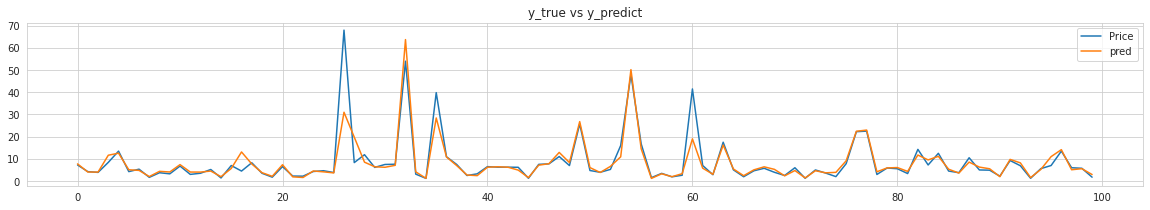

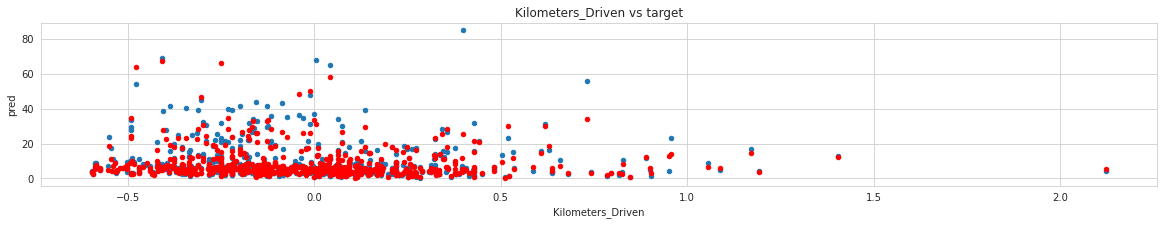

In [131]:
plot_regression(pd.DataFrame(X_test_std,columns=X.columns),y_test,svm,feat='Kilometers_Driven')

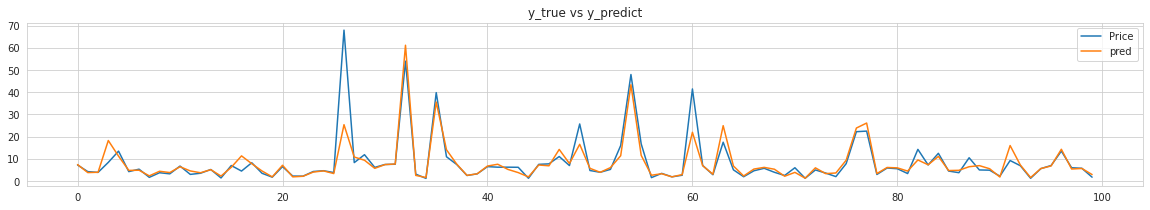

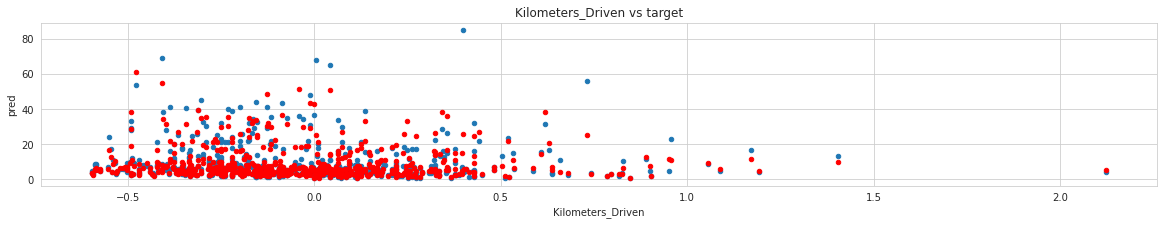

In [132]:
plot_regression(pd.DataFrame(X_test_std,columns=X.columns),y_test,Knn,feat='Kilometers_Driven')